In [ ]:
#Import necessary library case uts
import numpy as np
import pandas as pd

In [ ]:
def potential(xmin, xmax):
  '''
  Determine the potential within the system in certain interval
  Input   : x interval
  Return  : potential
  '''

  # potential_v = 0
  v1 = 7
  v0 = 0
  # if (xmin < 0):
  #   # potential_v = v1*(2*xmax)/2
  #   potential_v = (2*v1/(2*xmax)) * abs(xmin)
  # else:
  #   potential_v = v0

  # A
  # if (xmin < 0):
  #   potential_v = v0+v1
  # else:
  #   potential_v = 0

  # B
  # if (xmin < 0):
  #   potential_v = 0
  # else:
  #   potential_v = v0+v1

  #C
  # if (x > -(xmax/2) or x < (xmax/2) ):
  #   potential_v = v0+v1
  # else:
  #   potential_v = 0

  #D
  potential_v = v1/2

  return potential_v

In [ ]:
def normalize(n, h, psi):
  '''
  Normalize wave function
  Input   : initial wave function, number of points, step
  Return  : normalized wave function
  '''
  norm = psi[0]**2+psi[n]**2
  for i in range(1,n-3,2):
    norm = norm+4*psi[i]**2+2*psi[i+1]**2

  norm = norm + 4*psi[n-1]**2
  norm = 1/np.sqrt((norm*h/3))

  for i in range(0, len(psi)):
   psi[i] = psi[i]*norm

  return psi

In [ ]:
def numerov(nx, x, e_init, psi):
  '''
  Integrates the wave function using Numerov's method
  Input   : number of points, x inteval, initial energy, wave function
  Return  : integrated wave function
  '''

  #Calculates the steps
  h = xmax/nx
  h2 = h**2
  h12 = h2/12

  #Initialize wave function
  psi[0] = 0
  psi[1] = 0.0001

  #Calculates using Numerov's nethod
  fn = 2*(potential(-x, x)-e_init)
  q0 = psi[0]*(1-h12*fn)
  fn = 2*(potential(-x+h, x)-e_init)
  q1 = psi[1]*(1-h12*fn)
  
  for n in range(2, 2*nx+1):
    q2 = h2*fn*psi[n-1]+2*q1-q0
    fn = 2*(potential(n*h-x, x)-e_init)
    psi[n] = q2/(1-h12*fn)
    q0 = q1
    q1 = q2

  psi = normalize(2*nx, h, psi)

  return psi

In [ ]:
def calculates(nx, x, e_init, de, eps, psi):
  '''
  Starting course search and approximate energy level using bisection method
  Input   : number of points, x inteval, initial energy,
            eps, lists to store energy and deviation
  Return  : Energy approximation, wave function
  '''
  #Starting course search
  psi = numerov(nx, x, e_init, psi)
  dev1 = psi[2*nx]

  while True:
    #Update energy with de step
    e2 = e_init + de
 
    psi = numerov(nx, x, e2, psi)
    dev2 = psi[2*nx]

    #Check if deviation is zero
    if dev1*dev2 < 0:
      break

    #Update energy and deviation value for next iteration  
    e_init = e2
    dev1 = dev2

  #Starting bisection
  while abs(e_init-e2) > eps:
    e3 = (e_init+e2)/2
    psi = numerov(nx,x,e3,psi)
    dev3 = psi[2*nx]

    if dev3*dev1 <= 0.000000 :
      e2 = e3
      dev2 = dev3
    else:
      e_init = e3
      dev2 = dev3

  return e3, psi

In [ ]:
def schrod(nx, xmax, e0, de, filename, n):
  '''
  Function to calculates energy and wave function
  Input   : number of points, x interval, initial energy, delta e, filename, energy level
  Return  : approximated energy, psi .date file
  '''
  #Initialize Parameters
  eps = 10e-6
  dx = xmax/nx

  #Initialize wave function
  psi = np.zeros(2*nx+1)

  #Calculates energy and deviation
  energy, psi = calculates(nx, xmax, e0, de, eps, psi)

  #Save output as dat file
  filename = filename + str(n) + '.dat'
  x = np.zeros(2*nx+1)
  for i in range(1, 2*nx+2):
    x[i-1] = (i-1)*dx-xmax
    
  with open(filename, 'w') as out_file:
    for item in range(len(psi)):
      # out_file.write(str(x[item]) + '      ' + (psi[item]) + '\n')
      out_file.write("{}      {}      \n".format(x[item], psi[item]))

  return energy

In [ ]:
#Initialize Parameters
nx = 100
xmax = 2 #L = 4
e0 = 0
de = 0.001
energy_level = [i for i in range(1, 11)]
energy_value = []
filename = 'psi-out'

for i in energy_level:
  energy = schrod(nx, xmax, e0, de, filename, i)
  energy_value.append(energy)

  #Update for the next energy level
  e0 = energy + 0.005

In [ ]:
#Make dataframe to store energy

output = pd.DataFrame(columns=['Energy Level', 'Energy (a.u.)'])

for i in range(len(energy_level)):
  output.loc[i] = [energy_level[i], energy_value[i]]

output

,Energy Level,Energy (a.u.)
0,1.0,3.808430
1,2.0,4.733703
2,3.0,6.275820
3,4.0,8.434797
4,5.0,11.210633
5,6.0,14.603297
6,7.0,18.612820
7,8.0,23.239188
8,9.0,28.482398
9,10.0,34.342438


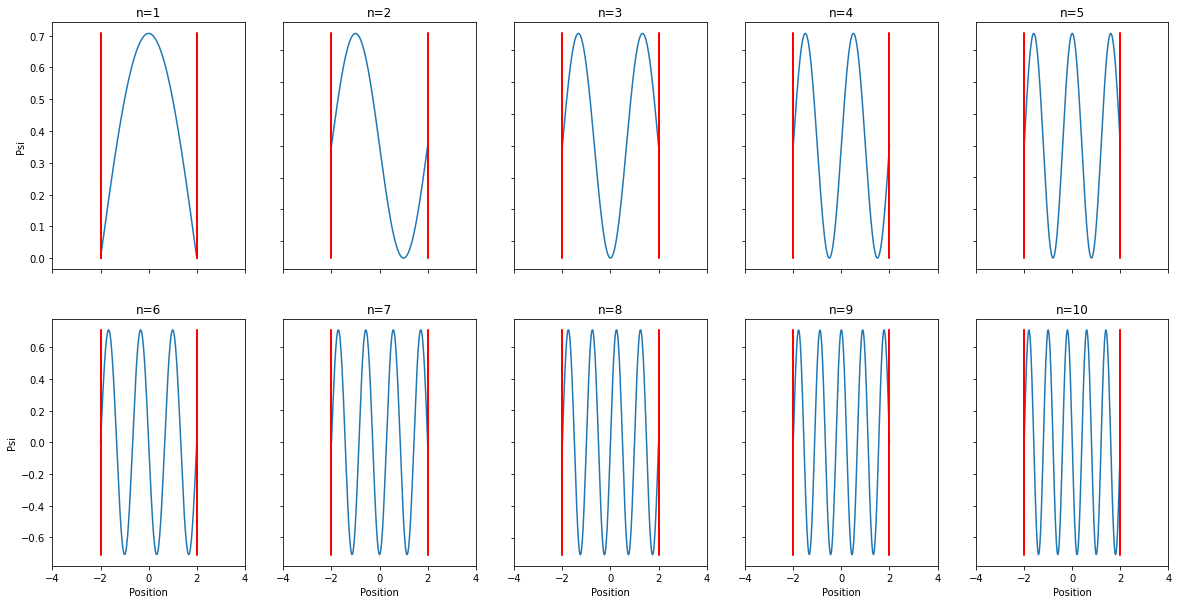

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
xbound = 2
x_bound1 = np.ones(2*nx+1)
x_bound2 = np.ones(2*nx+1)
x_bound1 = x_bound1 * -xbound
x_bound2 = x_bound2 * xbound

filename = 'psi-out'
for n in range(1, 11):
  data = np.loadtxt(filename+str(n)+'.dat', unpack=True)
  x_pos = data[0]
  psii = data[1]

  if n < 6:
    ax[0, n-1].plot(x_pos, psii)
    ax[0, n-1].plot(x_bound1, psii, color='red')
    ax[0, n-1].plot(x_bound2, psii, color='red')
    ax[0, n-1].set_title('n='+ str(n))
    ax[0, n-1].set_xlim(-4, 4)
  else:
    ax[1, n-6].plot(x_pos, psii)
    ax[1, n-6].plot(x_bound1, psii, color='red')
    ax[1, n-6].plot(x_bound2, psii, color='red')
    ax[1, n-6].set_title('n='+ str(n))
    ax[1, n-6].set_xlim(-4, 4)

for axis in ax.flat:
  axis.set(xlabel='Position', ylabel='Psi')

for axis in ax.flat:
    axis.label_outer()

plt.show()

In [ ]:
#analytical solution
energy_level = [n for n in range(1, 11)]
L = 4
v0 = 0
v1 = 2
energy_analytic = []

for n in energy_level:
  e = (n**2 * (((np.pi**2)/2)/L**2)) + v0 + (2*v1)/L #(L*v1)/2 #(L*(v1/2))
  energy_analytic.append(e)

for i in range(len(energy_analytic)):
  print('{}  :  {}\n'.format(i+1, energy_analytic[i]))

1  :  1.3084251375340425

2  :  2.2337005501361697

3  :  3.775826237806382

4  :  5.934802200544679

5  :  8.710628438351062

6  :  12.103304951225528

7  :  16.11283173916808

8  :  20.739208802178716

9  :  25.982436140257438

10  :  31.842513753404244



In [ ]:
# !rm *